<a href="https://colab.research.google.com/github/Gauravlightnin95/GautechAI/blob/main/GautechAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GautechAI

In [2]:
# This block sets up the Kaggle API key
import os
from google.colab import files

# Prompt to upload the kaggle.json file
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("Please upload your kaggle.json file")
    files.upload() # This will open a file upload dialog

    # Create the necessary directory and set permissions
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("\nKaggle API configured successfully!")
else:
    print("Kaggle API is already configured.")

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json

Kaggle API configured successfully!


In [3]:
# Download the dataset from Kaggle using its API command
!kaggle datasets download -d lukex9442/indian-bovine-breeds

# Unzip the downloaded file quietly (-q) into a specific directory
!unzip -q indian-bovine-breeds.zip -d bovine_breeds_luke

print("Dataset downloaded and extracted.")

# Let's find the correct path to the images
# The actual images are often nested in a subdirectory
!ls -R bovine_breeds_luke

Dataset URL: https://www.kaggle.com/datasets/lukex9442/indian-bovine-breeds
License(s): CC0-1.0
100% 2.83G/2.84G [00:26<00:00, 200MB/s]
100% 2.84G/2.84G [00:26<00:00, 117MB/s]
Dataset downloaded and extracted.
bovine_breeds_luke:
bovine_breeds_metadata.csv  Indian_bovine_breeds

bovine_breeds_luke/Indian_bovine_breeds:
Indian_bovine_breeds

bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds:
Alambadi     Gir		Kasargod	Nagpuri     Surti
Amritmahal   Guernsey		Kenkatha	Nili_Ravi   Tharparkar
Ayrshire     Hallikar		Kherigarh	Nimari	    Toda
Banni	     Hariana		Khillari	Ongole	    Umblachery
Bargur	     Holstein_Friesian	Krishna_Valley	Pulikulam   Vechur
Bhadawari    Jaffrabadi		Malnad_gidda	Rathi
Brown_Swiss  Jersey		Mehsana		Red_Dane
Dangi	     Kangayam		Murrah		Red_Sindhi
Deoni	     Kankrej		Nagori		Sahiwal

bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds/Alambadi:
Alambadi_100.jpg  Alambadi_31.png  Alambadi_55.jpg  Alambadi_79.jpg
Alambadi_101.png  Alambadi_32.pn

In [6]:
# Run this to see the actual folder structure
!ls -R bovine_breeds_luke

bovine_breeds_luke:
bovine_breeds_metadata.csv  Indian_bovine_breeds

bovine_breeds_luke/Indian_bovine_breeds:
Indian_bovine_breeds

bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds:
Alambadi     Gir		Kasargod	Nagpuri     Surti
Amritmahal   Guernsey		Kenkatha	Nili_Ravi   Tharparkar
Ayrshire     Hallikar		Kherigarh	Nimari	    Toda
Banni	     Hariana		Khillari	Ongole	    Umblachery
Bargur	     Holstein_Friesian	Krishna_Valley	Pulikulam   Vechur
Bhadawari    Jaffrabadi		Malnad_gidda	Rathi
Brown_Swiss  Jersey		Mehsana		Red_Dane
Dangi	     Kangayam		Murrah		Red_Sindhi
Deoni	     Kankrej		Nagori		Sahiwal

bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds/Alambadi:
Alambadi_100.jpg  Alambadi_31.png  Alambadi_55.jpg  Alambadi_79.jpg
Alambadi_101.png  Alambadi_32.png  Alambadi_56.png  Alambadi_7.png
Alambadi_10.png   Alambadi_33.png  Alambadi_57.jpg  Alambadi_80.png
Alambadi_11.png   Alambadi_35.jpg  Alambadi_58.png  Alambadi_81.png
Alambadi_12.jpg   Alambadi_36.png  Alam

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os

# --- IMPORTANT ---
# This path must match the folder structure from Step 2
DATASET_PATH = 'bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds'

IMAGE_SIZE = (224, 224) # Standard size for transfer learning
BATCH_SIZE = 32
EPOCHS = 20 # A good starting point

In [8]:
# Create the training dataset (80% of the data)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the validation dataset (20% of the data)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Get the class names (breed names inferred from folder names)
class_names = train_dataset.class_names
print("Found the following breeds (classes):")
print(class_names)
NUM_CLASSES = len(class_names)

# Optimize for performance by caching and prefetching
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 5947 files belonging to 41 classes.
Using 4758 files for training.
Found 5947 files belonging to 41 classes.
Using 1189 files for validation.
Found the following breeds (classes):
['Alambadi', 'Amritmahal', 'Ayrshire', 'Banni', 'Bargur', 'Bhadawari', 'Brown_Swiss', 'Dangi', 'Deoni', 'Gir', 'Guernsey', 'Hallikar', 'Hariana', 'Holstein_Friesian', 'Jaffrabadi', 'Jersey', 'Kangayam', 'Kankrej', 'Kasargod', 'Kenkatha', 'Kherigarh', 'Khillari', 'Krishna_Valley', 'Malnad_gidda', 'Mehsana', 'Murrah', 'Nagori', 'Nagpuri', 'Nili_Ravi', 'Nimari', 'Ongole', 'Pulikulam', 'Rathi', 'Red_Dane', 'Red_Sindhi', 'Sahiwal', 'Surti', 'Tharparkar', 'Toda', 'Umblachery', 'Vechur']


In [9]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

In [10]:
# 1. Define the input shape
input_shape = IMAGE_SIZE + (3,)

# 2. Get the pre-trained base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False, # We don't need the original classification layer
    weights='imagenet'
)

# 3. Freeze the base model so we don't re-train it
base_model.trainable = False

# 4. Create our new model by adding our custom layers on top
model = Sequential([
    layers.Input(shape=input_shape),
    data_augmentation,
    layers.Rescaling(1./255), # Normalize pixels from 0-255 to 0-1
    base_model,
    layers.GlobalAveragePooling2D(), # Condense the feature map
    layers.Dropout(0.2), # Regularization to prevent overfitting
    layers.Dense(NUM_CLASSES, activation='softmax') # Our final prediction layer
])

# Print the model summary to see the architecture
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 41)             │        52,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,310,505 (8.81 MB)

 Trainable params: 52,521 (205.16 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
print("Starting model training...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("Model training finished.")

Starting model training...
Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.0954 - loss: 3.7968 - val_accuracy: 0.2616 - val_loss: 2.7411
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.2379 - loss: 2.8511 - val_accuracy: 0.3162 - val_loss: 2.4384
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.3053 - loss: 2.5485 - val_accuracy: 0.3188 - val_loss: 2.3806
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.3196 - loss: 2.3967 - val_accuracy: 0.3507 - val_loss: 2.3186
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.3452 - loss: 2.2549 - val_accuracy: 0.3667 - val_loss: 2.2677
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.3687 - loss: 2.2293 - val_accuracy: 0.3482 - val_loss: 2.2811
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.3887 - loss: 2.1341 - val_accuracy: 0.3642 - val_loss: 2.2275
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.371

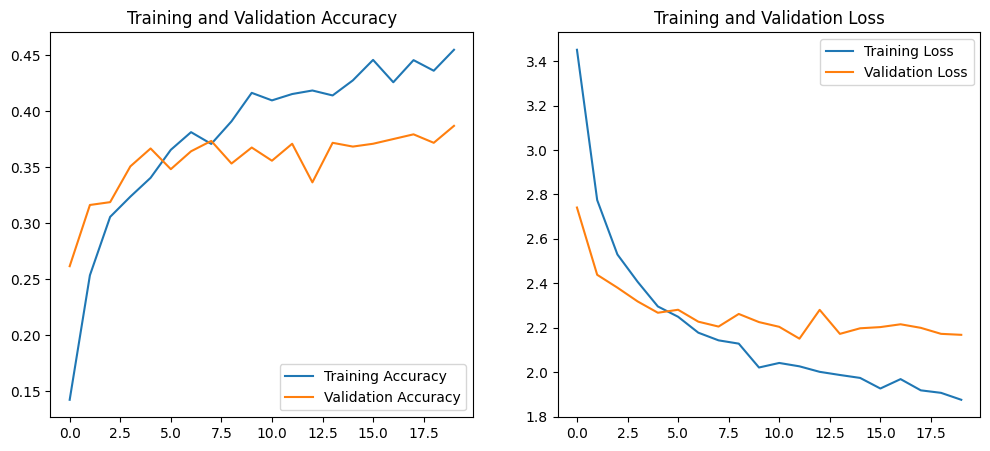

In [12]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Save the model to a file
MODEL_FILENAME = "indian_bovine_breeds_luke_model.h5"
model.save(MODEL_FILENAME)

print(f"Model saved successfully as {MODEL_FILENAME}")

Model saved successfully as indian_bovine_breeds_luke_model.h5


--- Testing on a random dataset image: bovine_breeds_luke/Indian_bovine_breeds/Indian_bovine_breeds/Kasargod/00000193.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


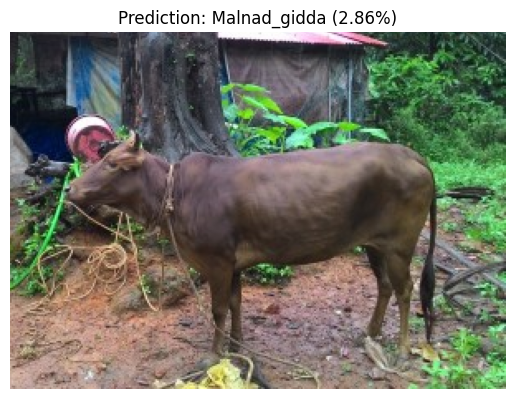

In [14]:
# Load the saved model from the file
saved_model = tf.keras.models.load_model(MODEL_FILENAME)

def predict_image(image_path):
    """Loads an image, preprocesses it, and predicts its class."""
    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # Make prediction
    predictions = saved_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    return predicted_class, confidence

# --- Find a random image from the dataset to test ---
image_path_to_test = None
for root, _, files in os.walk(DATASET_PATH):
    if files:
        # Pick the first image found
        image_path_to_test = os.path.join(root, files[0])
        break

# --- Display the image and the prediction ---
if image_path_to_test:
    print(f"--- Testing on a random dataset image: {image_path_to_test} ---")
    breed, conf = predict_image(image_path_to_test)

    img = plt.imread(image_path_to_test)
    plt.imshow(img)
    plt.title(f"Prediction: {breed} ({conf:.2f}%)")
    plt.axis('off')
    plt.show()
else:
    print("Could not find an image to test.")

Please upload an image of a bovine to test.


Saving download (2).jpeg to download (2).jpeg

Uploaded file: download (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


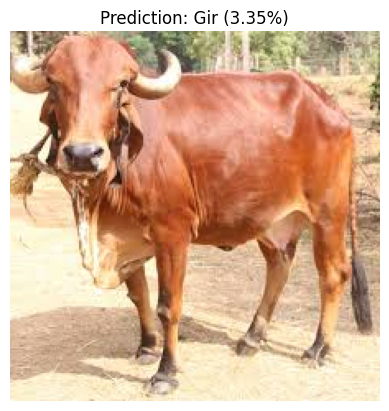

In [15]:
# Import the file upload library
from google.colab import files

print("Please upload an image of a bovine to test.")
uploaded = files.upload()

# Get the name of the file you uploaded
filename = next(iter(uploaded))
print(f"\nUploaded file: {filename}")

# --- Make a prediction on your uploaded image ---
breed, conf = predict_image(filename)

# --- Display the image and the prediction result ---
img = plt.imread(filename)
plt.imshow(img)
plt.title(f"Prediction: {breed} ({conf:.2f}%)")
plt.axis('off')
plt.show()